In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split as tts
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings("ignore")
import statsmodels.api as sm
from sklearn.feature_selection import RFE

In [2]:
df=pd.read_csv('gapminder.csv')

In [3]:
df.head()

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality,Region
0,34811059.0,2.73,0.1,3.328945,24.59620,12314.0,129.9049,75.3,29.5,Middle East & North Africa
1,19842251.0,6.43,2.0,1.474353,22.25083,7103.0,130.1247,58.3,192.0,Sub-Saharan Africa
2,40381860.0,2.24,0.5,4.785170,27.50170,14646.0,118.8915,75.5,15.4,America
3,2975029.0,1.40,0.1,1.804106,25.35542,7383.0,132.8108,72.5,20.0,Europe & Central Asia
4,21370348.0,1.96,0.1,18.016313,27.56373,41312.0,117.3755,81.5,5.2,East Asia & Pacific


In [4]:
df['Region'].value_counts() #Counting the each value of Region column

Europe & Central Asia         41
Sub-Saharan Africa            40
America                       27
East Asia & Pacific           14
Middle East & North Africa    10
South Asia                     7
Name: Region, dtype: int64

In [5]:
dummies=pd.get_dummies(df['Region']) #Converting categorical variable('Region') into dummy/indicator variables.
df = df.drop(['Region'],1)
df = pd.concat([df,dummies],axis=1) #Concatinating datafame dummies with df

In [6]:
df.dtypes

population                    float64
fertility                     float64
HIV                           float64
CO2                           float64
BMI_male                      float64
GDP                           float64
BMI_female                    float64
life                          float64
child_mortality               float64
America                         uint8
East Asia & Pacific             uint8
Europe & Central Asia           uint8
Middle East & North Africa      uint8
South Asia                      uint8
Sub-Saharan Africa              uint8
dtype: object

MinMaxScaler scales and translates each feature individually such that it is in the given range on the training set, e.g. between zero and one.

In [7]:
scalar = MinMaxScaler()
gapminder = scalar.fit_transform(df)

In [8]:
gapminder = pd.DataFrame(gapminder) #Converting ndarray into Pandas DataFrame
col_list = list(df) #Assigning list of columns from DataFrame df to variable col_list
gapminder.columns = col_list #Assigning col_list to the columns of DataFrame gapminder 
gapminder.head()

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality,America,East Asia & Pacific,Europe & Central Asia,Middle East & North Africa,South Asia,Sub-Saharan Africa
0,0.028855,0.229794,0.001548,0.068188,0.520969,0.093443,0.691602,0.804813,0.141574,0.0,0.0,0.0,1.0,0.0,0.0
1,0.016348,0.816165,0.075077,0.030101,0.229964,0.051917,0.703734,0.350267,1.000000,0.0,0.0,0.0,0.0,0.0,1.0
2,0.033510,0.152139,0.017028,0.098094,0.881472,0.112027,0.083681,0.810160,0.067089,1.0,0.0,0.0,0.0,0.0,0.0
3,0.002254,0.019017,0.001548,0.036873,0.615170,0.054149,0.852002,0.729947,0.091389,0.0,0.0,1.0,0.0,0.0,0.0
4,0.017625,0.107765,0.001548,0.369818,0.889169,0.324525,0.000000,0.970588,0.013207,0.0,1.0,0.0,0.0,0.0,0.0


# 1) KNN Regression

In [9]:
x = gapminder.drop(['life'],1) #Dropping Life column from entire DataFrame
y = gapminder['life'] #Assgining only Life column 

Train Test Split

In [10]:
x_train, x_test, y_train, y_test = tts(x, y, test_size=0.3, random_state=13)

In [11]:
r2_list = [] #List varialbe to store R2_Score
#Funciton to iterate between neighours from 3 to 11
for i in range(3,12):
    knn = KNeighborsRegressor(i)
    knn.fit(x_train,y_train)
    y_pred = knn.predict(x_test)
    r2 = r2_score(y_test,y_pred)
    r2_list.append(r2)
R2_score=pd.Series(r2_list)
R2_score.max()

0.7974123568651496

Max R2 score is 0.798 so, accuracy of this KNN regression is 79%

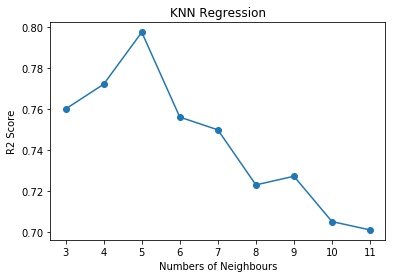

In [12]:
plt.title('KNN Regression') 
plt.xlabel('Numbers of Neighbours')
plt.ylabel('R2 Score')
plt.plot(range(3,12),R2_score,marker = 'o')
plt.show()

As Numbers of Neighbours increase, R2 increases till a certain Numbers of Neighbours after that it keeps on decreasing.

From the above graph we can see that at Numbers of Neighbours = 5 R2 Score is maximum and if we increase Numbers of Neighbours, R2 Score decreases

# 2) KNN Classification

Using LabelEncoder which encode labels with value between 0 and n_classes-1

In [13]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [14]:
gapminder = pd.read_csv('gapminder.csv')
x = gapminder.drop('Region',1) #Dropping Region column from entire DataFrame
y = gapminder['Region'] #Assgining only Region column 

In [15]:
Region = list(set(y)) #Coverting List into set
le.fit(Region) #Fit label encoder
y = le.transform(y) #Transform labels to normalized encoding

Tain Test Split

In [16]:
x_train, x_test, y_train, y_test = tts(x, y, test_size=0.3, random_state=13)

In [17]:
r2_list = [] #List varialbe to store R2_Score
#Funciton to iterate between neighours from 3 to 11
for i in range(3,12):
    knn = KNeighborsClassifier(i)
    knn.fit(x_train,y_train)
    y_pred = knn.predict(x_test)
    r2 = r2_score(y_test,y_pred)
    r2_list.append(r2)
R2_score=pd.Series(r2_list)
R2_score.max()

-0.4088447653429603

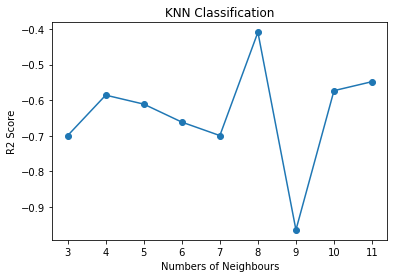

In [18]:
plt.title('KNN Classification') 
plt.xlabel('Numbers of Neighbours')
plt.ylabel('R2 Score')
plt.plot(range(3,12),R2_score,marker = 'o')
plt.show()

As Numbers of Neighbours increase, R2 slightly increases till a certain value and and then decrease till Numbers of Neighbours = 7 but at Numbers of Neighbours = 8 it's the heightest.

# 5 Assumptions of linear regression

Assumption 1: Relationship between your independent and dependent variables should always be linear i.e. you can depict a relationship between two variables with help of a straight line.

Assumption 2: Mean of residuals should be zero or close to 0 as much as possible. It is done to check whether our line is actually the line of “best fit”. We want the arithmetic sum of these residuals to be as much equal to zero as possible.

Assumption 3: There should be homoscedasticity or equal variance in our regression model. This assumption means that the variance around the regression line is the same for all values of the predictor variable (X). We make a plot of residual values on the y-axis and the predicted values on the x-axis. If we see a bell curve, then we can say that there is no homoscedasticity. It means that the variability of a variable is unequal across the range of values of a second variable that predicts it.

Assumption 4: There should be no perfect multicollinearity in your model. Multicollinearity generally occurs when there are high correlations between two or more independent variables. In other words, one independent variable can be used to predict the other. This creates redundant information, skewing the results in a regression model. We can check multicollinearity using VIF(variance inflation factor). Higher the VIF for an independent variable, more is the chance that variable is already explained by other independent variables.

Assumption 5: The linear regression analysis requires all variables to be multivariate normal.  This assumption can best be checked with a histogram or a Q-Q-Plot.  Normality can be checked with a goodness of fit test, e.g., the Kolmogorov-Smirnov test.  When the data is not normally distributed a non-linear transformation (e.g., log-transformation) might fix this issue.



# Pearson Correlation heatmap

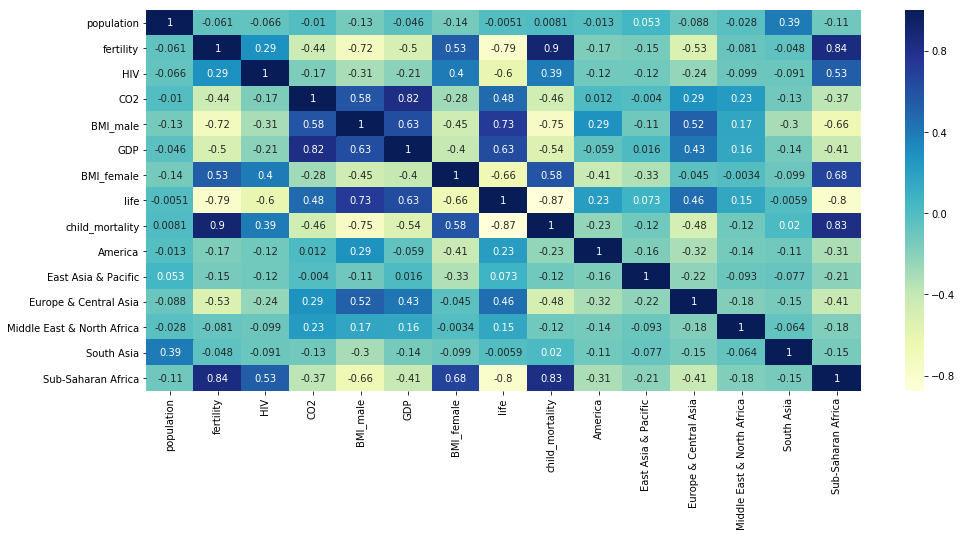

In [19]:
df = pd.read_csv('gapminder.csv')
dummies=pd.get_dummies(df['Region'])
df = df.drop(['Region'],1)
df = pd.concat([df,dummies],axis=1)
plt.figure(figsize=(16,7))
sns.heatmap(df.corr(),annot=True,cmap='YlGnBu')

In [20]:
x = df[['fertility','HIV','GDP','BMI_female','child_mortality']]
y = df['life']
X_train,X_test,y_train, y_test = tts(x,y, test_size = 0.3, random_state = 0)

In [21]:
lin_reg = LinearRegression(normalize=True)
lin_reg.fit(X_train,y_train)
y_pred = lin_reg.predict(X_test)
r2_score(y_test,y_pred)

0.8220259542918456

# Backward elimination

In [22]:
df = pd.read_csv('gapminder.csv')
df = pd.get_dummies(df)

In [23]:
df = df.drop('Region_America',1)

In [24]:
x = df.drop('life',1)
y = df['life']
model = sm.OLS(y,x).fit() #Linear regression using ordinary least squares.

In [25]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   life   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                     4014.
Date:                Wed, 02 Oct 2019   Prob (F-statistic):          4.01e-158
Time:                        19:24:33   Log-Likelihood:                -369.16
No. Observations:                 139   AIC:                             764.3
Df Residuals:                     126   BIC:                             802.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
population                         5.688e-10    3.1e-09      0.183      0.855   -5.57e-09     6.7e-09
fertility                            -0.0079      0.557     -0.014      0.989      -1.110       1.094
HIV                                  -0.6360      0.092     -6.946      0.000      -0.817      -0.455
CO2                                  -0.3702      0.090     -4.122      0.000      -0.548      -0.192
BMI_male                              1.2060      0.261      4.629      0.000       0.690       1.722
GDP                                   0.0002   3.31e-05      6.094      0.000       0.000       0.000
BMI_female                            0.3579      0.056      6.434      0.000       0.248       0.468
child_mortality                      -0.0958      0.018     -5.306      0.000      -0.132      -0.060
Region_East Asia & Pacific            0.0383      1.309      0.029      0.977      -2.552       2.629
Region_Europe & Central Asia         -3.0142      1.069     -2.819      0.006      -5.130      -0.898
Region_Middle East & North Africa    -1.2240      1.423     -0.860      0.391      -4.039       1.592
Region_South Asia                     2.4741      1.938      1.276      0.204      -1.362       6.310
Region_Sub-Saharan Africa            -2.7672      1.860     -1.487      0.139      -6.449       0.915
==============================================================================
Omnibus:                        4.764   Durbin-Watson:                   2.022
Prob(Omnibus):                  0.092   Jarque-Bera (JB):                4.642
Skew:                          -0.292   Prob(JB):                       0.0982
Kurtosis:                       3.679   Cond. No.                     9.42e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.42e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Dropping Popultion,Fertility,BMI_Male,Region_East Asia & Pacific,Region_Middle East & North Africa,Region_South Asia,Region_Sub-Saharan Africa as the P>[t] value is high 

In [26]:
x = x.drop(['population','fertility','BMI_male','Region_East Asia & Pacific','Region_Middle East & North Africa','Region_South Asia','Region_Sub-Saharan Africa'],1)

In [27]:
model = sm.OLS(y,x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   life   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                     6717.
Date:                Wed, 02 Oct 2019   Prob (F-statistic):          1.77e-162
Time:                        19:24:34   Log-Likelihood:                -390.82
No. Observations:                 139   AIC:                             793.6
Df Residuals:                     133   BIC:                             811.2
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
HIV                             -0.7749      0.087     -8.928      0.000      -0.947      -0.603
CO2                             -0.3180      0.099     -3.198      0.002      -0.515      -0.121
GDP                              0.0002   3.49e-05      6.576      0.000       0.000       0.000
BMI_female                       0.6046      0.007     89.836      0.000       0.591       0.618
child_mortality                 -0.1587      0.010    -15.188      0.000      -0.179      -0.138
Region_Europe & Central Asia    -2.7871      0.916     -3.044      0.003      -4.598      -0.976
==============================================================================
Omnibus:                        2.252   Durbin-Watson:                   1.777
Prob(Omnibus):                  0.324   Jarque-Bera (JB):                2.189
Skew:                          -0.239   Prob(JB):                        0.335
Kurtosis:                       2.614   Cond. No.                     6.65e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.65e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Dropping Region_Europe & Central Asia and CO2 as well

In [28]:
x = x.drop(['Region_Europe & Central Asia','CO2'],1)

In [29]:
model = sm.OLS(y,x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   life   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                     9056.
Date:                Wed, 02 Oct 2019   Prob (F-statistic):          6.15e-163
Time:                        19:24:34   Log-Likelihood:                -399.24
No. Observations:                 139   AIC:                             806.5
Df Residuals:                     135   BIC:                             818.2
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
HIV                -0.7589      0.091     -8.318      0.000      -0.939      -0.578
GDP                 0.0001   2.28e-05      5.737      0.000    8.55e-05       0.000
BMI_female          0.5956      0.006     92.424      0.000       0.583       0.608
child_mortality    -0.1477      0.010    -14.143      0.000      -0.168      -0.127
==============================================================================
Omnibus:                        3.798   Durbin-Watson:                   1.724
Prob(Omnibus):                  0.150   Jarque-Bera (JB):                3.181
Skew:                          -0.267   Prob(JB):                        0.204
Kurtosis:                       2.487   Cond. No.                     6.29e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.29e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Now we got P value is 0 for all the Features 

In [30]:
X = df[['HIV','GDP','BMI_female','child_mortality']]

In [31]:
X_train,X_test,y_train,y_test = tts(X,y,test_size = 0.3,random_state = 42)

In [32]:
lin_reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [33]:
y_pred = lin_reg.predict(X_test)
r2_score(y_test,y_pred)

0.8148964093063921

1)Features and R^2 score we got by Correlation heatmap:
'fertility','HIV','GDP','BMI_female','child_mortality'
0.8220259542918456

2)Features and R^2 score we got by Backward elimination method:
'HIV','GDP','BMI_female','child_mortality'
0.8148964093063921

As we can see R^2 score is almost same but with backward elimination we got on less Feature.

# RFE (4 features)

Recursive feature elimination (RFE) is a feature selection method that fits a model and removes the weakest feature (or features) until the specified number of features is reached.

In [34]:
rfe = RFE(lin_reg,4)
x = df.drop(['life'],1)
y = df['life']
rfe = rfe.fit(x,y)
print(rfe.support_) #Get a mask, or integer index, of the features selected
print(rfe.ranking_) #The feature ranking

[False  True False False  True False False False  True False False False
  True]
[10  1  3  8  1  9  5  7  1  2  4  6  1]


In [35]:
x.head()

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,child_mortality,Region_East Asia & Pacific,Region_Europe & Central Asia,Region_Middle East & North Africa,Region_South Asia,Region_Sub-Saharan Africa
0,34811059.0,2.73,0.1,3.328945,24.59620,12314.0,129.9049,29.5,0,0,1,0,0
1,19842251.0,6.43,2.0,1.474353,22.25083,7103.0,130.1247,192.0,0,0,0,0,1
2,40381860.0,2.24,0.5,4.785170,27.50170,14646.0,118.8915,15.4,0,0,0,0,0
3,2975029.0,1.40,0.1,1.804106,25.35542,7383.0,132.8108,20.0,0,1,0,0,0
4,21370348.0,1.96,0.1,18.016313,27.56373,41312.0,117.3755,5.2,1,0,0,0,0


As per RFE Fertility,BMI_male ,Region_East Asia & Pacific,Region_Sub-Saharan Africa are Important

In [36]:
x = df[['fertility','BMI_male','Region_East Asia & Pacific','Region_Sub-Saharan Africa']]

In [37]:
X_train,X_test,y_train,y_test = tts(X,y,test_size = 0.3,random_state = 42)
lin_reg.fit(X_train,y_train)
y_pred = lin_reg.predict(X_test)
r2_score(y_test,y_pred)

0.8148964093063921